### Importing Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [44]:
import tensorflow as tf
from tensorflow import keras

### Importing Dataset

In [61]:
from keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [54]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker'
,'Bag','Ankle boot']

#### Data Reshaping

In [62]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

#### Data normalazation
devide each pixel value with 255

In [63]:
X_train_n = X_train/255
X_test_n = X_test/255

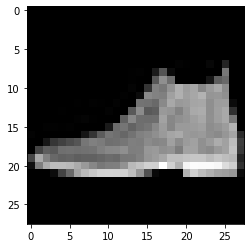

In [77]:
plt.imshow(X_test[0].reshape(28,28),cmap='gray')

### Spliting Data into train,validation and test datasets
Training Data--used for training the model
Validation Data--used for tuning the hyperpaarameters and evaluate the models
Test data--used to test the model after the traning and hyperparameter optimization

In [79]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_trained = y_train[:5000], y_train[5000:]
X_test = X_test_n

### Model Architecture
input layer (28x28x1)--> conv layer(26x26x32) padding=='valid'-->pooling layer(13x13x32)-->Flatten layer 5408 values --> Dense Layer1 300 neurons -->Dense Layer2 100 neurons --> Output Layer 10 neurons.

In [80]:
np.random.seed(42)
tf.random.set_seed(42)

In [82]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32,kernel_size = (3,3),strides = 1,padding = 'valid',activation='relu',input_shape=(28, 28, 1)))
model.add((keras.layers.MaxPooling2D((2,2))))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))


In [40]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [83]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
              metrics = ['accuracy']
             )

In [131]:



model_history = model.fit(X_train, y_trained, epochs=50,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 70s 1ms/sample - loss: 0.2085 - accuracy: 0.9236 - val_loss: 0.2766 - val_accuracy: 0.9026
Epoch 2/50
55000/55000 [==============================] - 68s 1ms/sample - loss: 0.2047 - accuracy: 0.9257 - val_loss: 0.2672 - val_accuracy: 0.9044
Epoch 3/50
55000/55000 [==============================] - 71s 1ms/sample - loss: 0.2013 - accuracy: 0.9267 - val_loss: 0.2986 - val_accuracy: 0.8928
Epoch 4/50
55000/55000 [==============================] - 83s 2ms/sample - loss: 0.1974 - accuracy: 0.9291 - val_loss: 0.2681 - val_accuracy: 0.9042
Epoch 5/50
55000/55000 [==============================] - 67s 1ms/sample - loss: 0.1927 - accuracy: 0.9300 - val_loss: 0.2665 - val_accuracy: 0.9048
Epoch 6/50
55000/55000 [==============================] - 64s 1ms/sample - loss: 0.1894 - accuracy: 0.9316 - val_loss: 0.2599 - val_accuracy: 0.9076
Epoch 7/50
55000/55000 [==============================] -

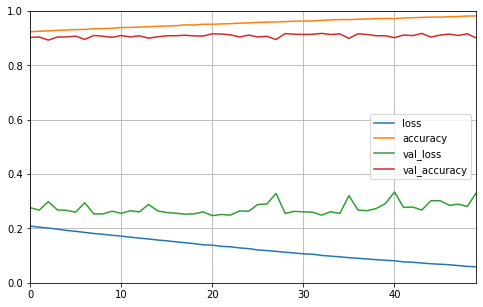

In [132]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [133]:
ev = model.evaluate(X_test_n, y_test)
ev

10000/10000 [==============================] - 5s 457us/sample - loss: 0.3306 - accuracy: 0.9060


[0.3306213421106339, 0.906]

In [120]:
X_new = X_test[:5]
y_pred = model.predict_classes(X_new)
y_pred = [class_names[i] for i in y_pred]

In [121]:

y_actual = [class_names[i] for i in y_test[:5]]

In [122]:
y_actual,y_pred

(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
 ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'])

AxesImage(54,36;334.8x217.44)


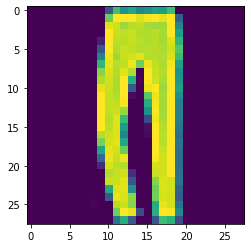

In [129]:
print(plt.imshow(X_test[2].reshape((28,28))))

In [130]:
keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session()>